## Offensive Review Prediction

### Importing required libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading csv file

In [2]:
df = pd.read_csv('offensive_language_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
df = df[['class','tweet']]

In [5]:
df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [6]:
def method1(i):
    i=i.split(':')
    if len(i)==2:
        return i[1]
    else:
        return i[0]
df['tweet']=df['tweet'].apply(lambda i:method1(i))

In [7]:
df.head()

,class,tweet
0,2,As a woman you shouldn't complain about clean...
1,1,boy dats cold...tyga dwn bad for cuffin dat h...
2,1,You ever fuck a bitch and she start to cry? Y...
3,1,@viva_based she look like a tranny
4,1,The shit you hear about me might be true or i...


In [9]:
def method2(i):
    if(i==1):
        return 0
    else:
        return int(i)
def method3(i):
    if(i==2):
        return 1
    else:
        return int(i)

### Replace 1 by 0 and 2 by 1.

In [10]:
df['class']=df['class'].apply(lambda i:method2(i))
df['class']=df['class'].apply(lambda i:method3(i))

In [11]:
df.head()

,class,tweet
0,1,As a woman you shouldn't complain about clean...
1,0,boy dats cold...tyga dwn bad for cuffin dat h...
2,0,You ever fuck a bitch and she start to cry? Y...
3,0,@viva_based she look like a tranny
4,0,The shit you hear about me might be true or i...


In [12]:
df['class'].value_counts()

0    20620
1     4163
Name: class, dtype: int64

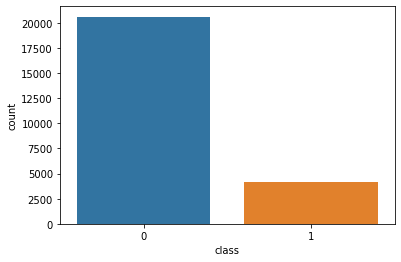

In [13]:
sns.countplot(df['class'])

### Splitting training and testing data

In [14]:
features_train, features_test, labels_train, labels_test = train_test_split(df['tweet'], df['class'], random_state = 42)

### Applying TfidfVectorizer

In [15]:
vect = TfidfVectorizer(min_df = 5).fit(features_train)
features_train_vectorized = vect.transform(features_train)

In [78]:
vect.vocabulary_

{'rt': 22164,
 'lynchiewcvb': 16343,
 'big': 3869,
 'night': 18471,
 'at': 2906,
 'wcvb': 28015,
 'martha': 16726,
 'coakley': 6158,
 'charlie': 5591,
 'baker': 3287,
 'debate': 7465,
 'here': 11959,
 'bruins': 4759,
 'minnesota': 17326,
 'wild': 28429,
 'world': 28661,
 'series': 22887,
 'game': 10607,
 'not': 18669,
 'one': 19113,
 'bitch': 3991,
 'is': 13333,
 'texting': 25440,
 'me': 16918,
 'right': 21854,
 'now': 18714,
 '000': 1,
 'followers': 10063,
 '22': 658,
 'inch': 13032,
 'rims': 21878,
 '60': 1037,
 'tv': 26759,
 'and': 2456,
 'straight': 24563,
 'ass': 2857,
 'teeth': 25352,
 'but': 4965,
 'text': 25437,
 'messages': 17074,
 'ima': 12923,
 'kill': 14806,
 'myself': 17998,
 '8220': 1168,
 'm_rad': 16384,
 'going': 11051,
 'to': 26150,
 'miss': 17365,
 'these': 25766,
 'bitches': 3997,
 'so': 23819,
 'much': 17838,
 '128557': 410,
 'http': 12453,
 'co': 6153,
 'lupoqat2r9': 16285,
 '8221': 1169,
 'far': 9535,
 'she': 23077,
 'resting': 21704,
 'on': 19105,
 'ol': 19050,
 

### Using Logistic Regression Algorithm

In [17]:
model = LogisticRegression()
model.fit(features_train_vectorized, labels_train)
predictions = model.predict(vect.transform(features_test))
roc_auc_score(labels_test, predictions)

0.7456581795278173

In [19]:
model.predict(vect.transform(['you are bitch']))

array([0], dtype=int64)

### Using nltk for data cleaning

In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re #regular expressions

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [76]:
review = re.sub('[^a-zA-Z]',' ',df['tweet'][0])

In [77]:
review

' As a woman you shouldn t complain about cleaning up your house   amp  as a man you should always take the trash out   '

In [24]:
review = review.lower()

In [25]:
review=review.split()

In [26]:
review = [word for word in review if not word in set(stopwords.words('english'))]

In [27]:
ps= PorterStemmer()

In [28]:
review = [ps.stem(word) for word in review ]

In [29]:
review = " ".join(review)

In [30]:
review

'woman complain clean hous amp man alway take trash'

In [31]:
df1 = pd.read_csv('offensive_language_dataset.csv')

In [32]:
df1 = df1[['class','tweet']]

In [33]:
df1['class']=df1['class'].apply(lambda i:method2(i))
df1['class']=df1['class'].apply(lambda i:method3(i))

In [34]:
df1.shape

(24783, 2)

In [35]:
corpus = []

for i in range(0, 24783):
    review = re.sub('[^a-zA-Z]',' ', df1.iloc[i,1])
    
    review = review.lower()
    
    review = review.split()
    
    review = [word for word in review if not word in set(stopwords.words('english'))]
    
    
    ps = PorterStemmer()
    
    review = [ps.stem(word) for word in review ]
    
    review = " ".join(review)
    
    corpus.append(review)

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
features = CountVectorizer().fit_transform(corpus)

In [38]:
labels = df.iloc[:, 0] 

#teain test spplit
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, random_state = 42)

In [39]:
model = LogisticRegression()
model.fit(features_train, labels_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
predictions = model.predict(features_test)

roc_auc_score(labels_test, predictions)

0.928474448671398

### For better implementation I'm trying to check accuracy of different algorithms

In [41]:
features_train, features_test, labels_train, labels_test = train_test_split(df1['tweet'],df1['class'],random_state = 42)

In [42]:
labels_test.shape

(6196,)

In [43]:
labels_train.shape

(18587,)

In [44]:
labels_test[0:10]

2281     0
15914    0
18943    1
16407    0
13326    0
12914    0
21457    0
12246    0
13083    0
19409    0
Name: class, dtype: int64

In [45]:
vect=CountVectorizer().fit(features_train)

In [47]:
len(vect.get_feature_names())

29600

In [48]:
features_train_vectorized = vect.transform(features_train)

### Using logistic Regression

In [49]:
model = LogisticRegression()

In [50]:
model.fit(features_train_vectorized, labels_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
from sklearn.metrics import roc_auc_score

In [52]:
predictions = model.predict(vect.transform(features_test))

In [53]:
lr_score=roc_auc_score(labels_test, predictions)

In [54]:
lr_score

0.9216578105622905

In [55]:
if model.predict(vect.transform(['you are bitch']))[0]==0:
    print('you are bitch is Not acceptable comment')
else:
    print('you are bitch is Acceptable comment')

you are bitch is Not acceptable comment


In [56]:
if model.predict(vect.transform(['you are beautiful']))[0]==0:
    print('you are beautiful is Not acceptable comment')
else:
    print('you are beautiful is Acceptable comment')

you are beautiful is Acceptable comment


### Using KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
model1=KNeighborsClassifier().fit(features_train_vectorized, labels_train)

In [59]:
predictions = model1.predict(vect.transform(features_test))

In [60]:
knn_score=roc_auc_score(labels_test, predictions)

In [61]:
knn_score

0.6703973181051198

### Using Decision Tree Classifier

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
model2=DecisionTreeClassifier().fit(features_train_vectorized, labels_train)

In [64]:
predictions = model2.predict(vect.transform(features_test))

In [65]:
dtc_score=roc_auc_score(labels_test, predictions)

In [66]:
dtc_score

0.9135662847500771

### Using Random Forest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
model3=RandomForestClassifier().fit(features_train_vectorized, labels_train)

In [69]:
predictions = model3.predict(vect.transform(features_test))

In [70]:
tfc_score=roc_auc_score(labels_test, predictions)

In [71]:
tfc_score

0.7860963354082986

In [72]:
ls1 = ['Logistic regression',lr_score]
ls2=['K nearest eighbours',knn_score]
ls3=['Decision tree classifier',dtc_score]
ls4=['Random forest classifier',tfc_score]

df_score = pd.DataFrame([ls1,ls2,ls3,ls4],columns=['Algorithms','score'])

In [73]:
df_score

,Algorithms,score
0,Logistic regression,0.921658
1,K nearest eighbours,0.670397
2,Decision tree classifier,0.913566
3,Random forest classifier,0.786096


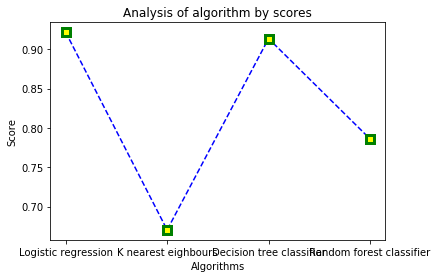

In [74]:
plt.plot(df_score['Algorithms'],df_score['score'],'b--',marker='s', markersize=8, markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green")
plt.xlabel('Algorithms')
plt.ylabel('Score')
plt.title('Analysis of algorithm by scores')
plt.show()

### As shown above, Logistic regression is better than other